**Importing libraries**

In [1]:
import pandas as pd
import numpy as np

**Loading the data**

In [2]:
ind = pd.read_csv("ind30_Investment_returns.csv", header = 0, index_col=0, parse_dates = True)/100
ind.index = pd.to_datetime(ind.index,  format = "%Y%m").to_period('M') # Converting the index into the datetime format

In [3]:
ind.head(5)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [4]:
ind.columns = ind.columns.str.strip() # removing the extra-space from the column names

### **Creating a module**

Module1 as a .py file, containing all the required functions for the analysis 

In [5]:
import Module1 as m1

In [6]:
%load_ext autoreload
%autoreload 2 # for updating the changes in Module1 automatically in the imported version of the module

### **Computing the Drawdown**

 i.e. the peak-to-trough decline during last 10 years

In [7]:
m1.drawdown(ind['Food']['2009':'2018']).head()

,Wealth,Peaks,Drawdown
2009-01,1004.100000,1004.100000,0.000000
2009-02,918.952320,1004.100000,-0.084800
2009-03,953.688718,1004.100000,-0.050205
2009-04,1009.002663,1009.002663,0.000000
2009-05,1056.425788,1056.425788,0.000000


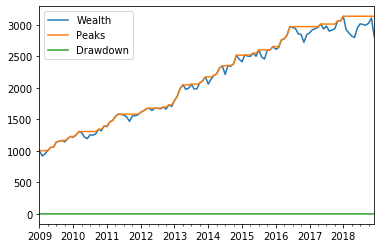

In [26]:
m1.drawdown(ind['Food']['2009':'2018']).plot.line()

In [9]:
m1.drawdown(ind['Food']['2009':'2018']).min() #Computing the minimum drawdown during the last 10 year period

Wealth       918.952320
Peaks       1004.100000
Drawdown      -0.107238
dtype: float64

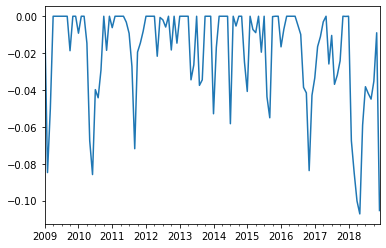

In [10]:
m1.drawdown(ind["Food"]['2009':'2018'])["Drawdown"].plot.line()

In [11]:
m1.drawdown(ind['Food']['2009':'2018']).max() #Computing the maximum drawdown during the last 10 year period

Wealth      3137.268496
Peaks       3137.268496
Drawdown       0.000000
dtype: float64

Finding **Skewness and Kurtosis** of the investment returns

In [12]:
m1.skewness(ind).sort_values().head(5)

Meals   -0.356591
BusEq   -0.212003
Telcm   -0.033990
Smoke    0.003873
Rtail    0.020736
dtype: float64

In [13]:
m1.kurtosis(ind).sort_values().head(5)

Meals    5.844337
Telcm    5.969455
Smoke    6.238037
BusEq    6.239064
Mines    6.378308
dtype: float64

### **Value at Risk Computation**

Calculated at 95% Confidence Interval i.e. computing 5% VaR

#### Methodologies:

1. Historical Approach

In [14]:
m1.var_hist(ind['2009':'2018']).head(5)

Food     0.046345
Beer     0.042905
Smoke    0.076965
Games    0.089520
Books    0.087670
dtype: float64

2. Parametric/Gaussian Approach (assumes portfolio returns to be normally distributed)

In [15]:
m1.var_gaussian(ind['2009':'2018']).head(5)

Food     0.044132
Beer     0.045789
Smoke    0.071005
Games    0.100913
Books    0.099586
dtype: float64

3. Modified/ Cornish-Fisher Approach

In [16]:
m1.var_modified(ind['2009':'2018']).head(5)

Food     0.048207
Beer     0.047508
Smoke    0.078347
Games    0.089056
Books    0.077582
dtype: float64

Comparison of VaR using different approaches

In [17]:
VaR_list = [m1.var_gaussian(ind['2009':'2018']), m1.var_modified(ind['2009':'2018']), m1.var_hist(ind['2009':'2018'])]
comparison = pd.concat(VaR_list, axis = 1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]

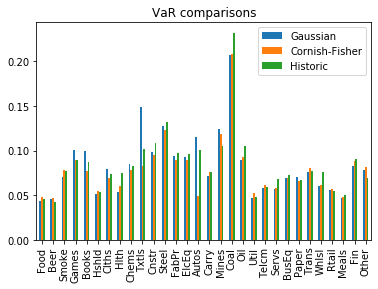

In [18]:
comparison.plot.bar(title="VaR comparisons")

Calculating ***Conditional VaR*** i.e. the average loss in case the loss exceeds the VaR

In [19]:
m1.cvar_hist(ind).head(5) # if loss exceeds the 5% VaR the average loss would be 10.36% for Food industry

Food     0.103659
Beer     0.145016
Smoke    0.122454
Games    0.199534
Books    0.157187
dtype: float64

Computing the **Sharpe Ratio** i.e. performance of an investment compared to a risk-free asset

Assuming the Risk-Free rate to be 3.6% or 0.036

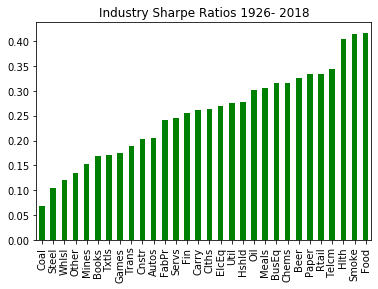

In [20]:
m1.sharpe_ratio(ind, 0.036, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 1926- 2018", color = 'green') 

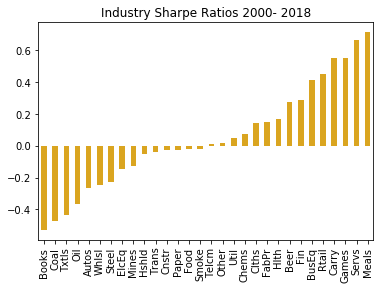

In [21]:
m1.sharpe_ratio(ind["2015":], 0.036, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 2000- 2018", color = 'goldenrod')

### Generating Efficient Frontier

1. Case for two assest classes

In [22]:
c = ["Rtail", "Fin"] #classes of assets in consideration

In [23]:
Expected_returns = m1.annualize_return(ind['1995':'2000'],12)
Return = Expected_returns[c] #computing expected returns of the 2 assets

In [24]:
Cov = ind['1995':'2000'].cov() 
Risk = Cov.loc[c,c]   #computing risk/volatility

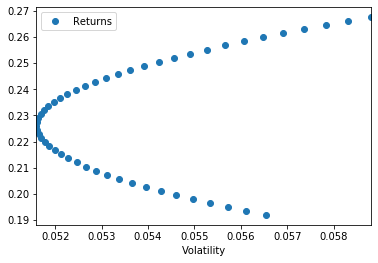

In [25]:
m1.plot_EF2(50, Return, Risk, style = "o")

The uppar part of the Efficient frontier is what we will be interested in as it contains the optimum portfolio weights. This is because in the lower part there will always exist a alternate allocation which will give more return at the same level of risk or lesser risk at the same level of return.